In [11]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

In [1]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

def build_pde(k_cp, k_pw, k_pc, d_p, k_w, u):
    pde_eq = PDE(
        rhs = {
            # crop - eaten by pest v
            "c": f"- {k_cp} * p * c",
            # the pest - killed by pesticide w, but replenished by the crops
            "p": f"{d_p} * laplace(p) - {k_pw} * p * w + {k_pc} * p * c",
            # the pesticide application rate and decay rate
            "w": f" {u}  - {k_w} * w",
        },
        bc={"value": 0}
    )
    return pde_eq

def init_state(n=32):
    # initialize state
    # this breaks the solver
    #grid = CartesianGrid([(-1,1),(-1,1)], [N, 32])
    grid = UnitGrid([n, n])
    c = ScalarField(grid, 1, label="Field $c$")
    p = ScalarField(grid, 0, label="Field $p$")
    #v = ScalarField.from_expression(grid, "exp(-((x-16)*(x-16)+(y-16)*(y-16))*20)", label="Field $v$")
    p.data[round(n/2),round(n/2)] = 100 * (n/32)**2
    p = p.smooth(sigma=n/32)
    w = ScalarField.from_expression(grid, f"abs(y**2)/({n}**2/4)", label="Field $w$")
    state = FieldCollection([c, p, w])
    return state


In [2]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid
eq = build_pde(k_cp=0.2, k_pw=0.3, k_pc=0.2, d_p = 1.0, k_w = 0.01, u = 0)
state = init_state(n=32)

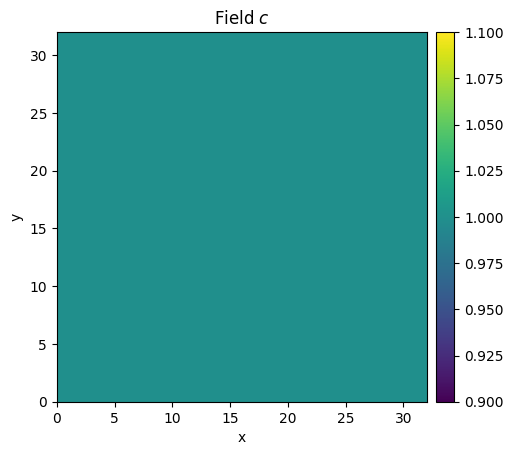

In [3]:
state.fields[0].plot()

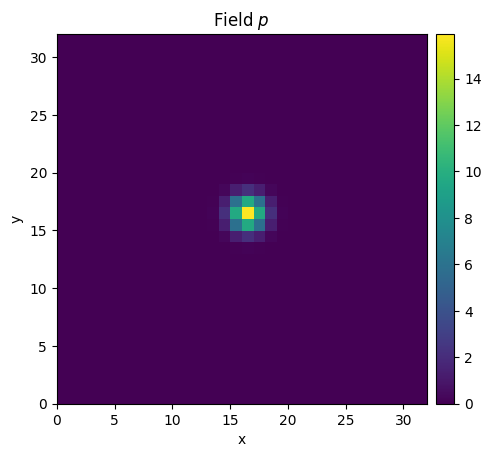

In [4]:
state.fields[1].plot()

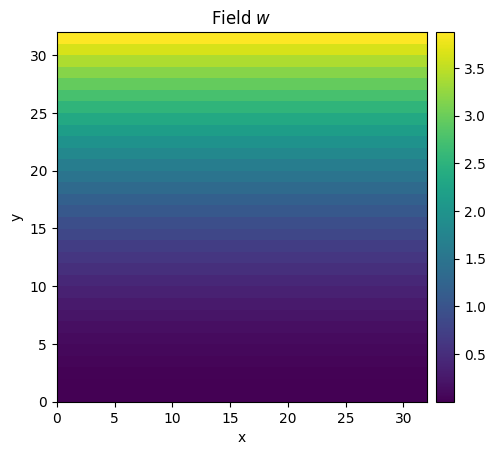

In [5]:
state.fields[2].plot()

In [6]:
# simulate the pde
#tracker = PlotTracker(interrupts=1, plot_args={"vmin": 0, "vmax": 5},movie='pest1.mp4')
tracker = PlotTracker(interrupts=1,movie='pest1.mp4')
sol = eq.solve(state, t_range=40, dt=.05, tracker=tracker)

Lower res sim

In [7]:
eq = build_pde(k_cp=0.2, k_pw=0.3, k_pc=0.2, d_p = 0.5, k_w = 0.01, u = 0)
state = init_state(n=16)

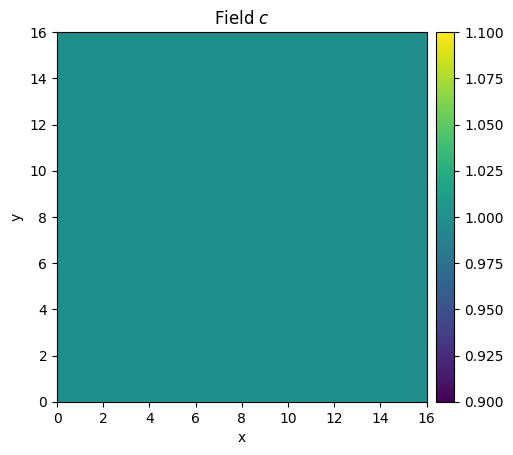

In [8]:
state.fields[0].plot()

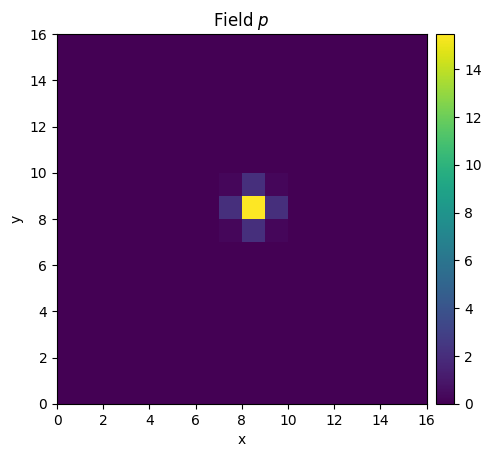

In [9]:
state.fields[1].plot()

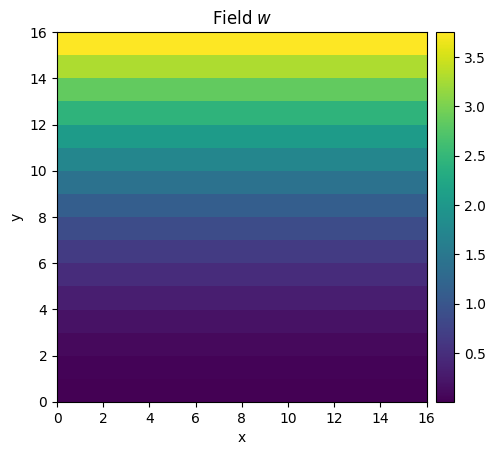

In [10]:
state.fields[2].plot()

In [11]:
# simulate the pde
#tracker = PlotTracker(interrupts=1, plot_args={"vmin": 0, "vmax": 5},movie='pest1.mp4')
tracker = PlotTracker(interrupts=1,movie='pest1_lowres.mp4')
sol = eq.solve(state, t_range=40, dt=.05, tracker=tracker)

In [166]:
tmp = state.grid.make_operator("laplace", bc={"value": 0})